In [68]:
import pandas as pd
import numpy as np

In [ ]:
# 1
ds = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
ds.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [ ]:
# 2
ds['Age'].mean()

29.471443066516347

In [ ]:
# 3
ds = pd.read_csv('/content/drive/MyDrive/Datasets/WHO-COVID-19-global-data.csv')
ds[ds['Date_reported'].apply(lambda date: date.split('-')[0] == '2022')]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
104,2022-01-02,AF,Afghanistan,EMRO,210.0,158112,4.0,7356
105,2022-01-09,AF,Afghanistan,EMRO,233.0,158345,13.0,7369
106,2022-01-16,AF,Afghanistan,EMRO,333.0,158678,9.0,7378
107,2022-01-23,AF,Afghanistan,EMRO,870.0,159548,12.0,7390
108,2022-01-30,AF,Afghanistan,EMRO,2118.0,161666,17.0,7407
...,...,...,...,...,...,...,...,...
53448,2022-11-27,ZW,Zimbabwe,AFRO,311.0,258954,5.0,5616
53449,2022-12-04,ZW,Zimbabwe,AFRO,396.0,259350,6.0,5622
53450,2022-12-11,ZW,Zimbabwe,AFRO,6.0,259356,NaN,5622
53451,2022-12-18,ZW,Zimbabwe,AFRO,203.0,259559,3.0,5625


In [34]:
# 4
header = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

ds = pd.read_csv('/content/drive/MyDrive/Datasets/wine.data', header=None)
ds.columns = header
ds['Alcohol amount'] = ['High' if x >= ds['Alcohol'].median() else 'Low' for x in ds['Alcohol']]
ds['Alcohol amount'].value_counts()

Alcohol amount
High    91
Low     87
Name: count, dtype: int64

In [38]:
# 5
ds = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
ds['Survived'].value_counts()

Survived
0    545
1    342
Name: count, dtype: int64

In [43]:
# 6
ds = pd.read_csv('/content/drive/MyDrive/Datasets/WHO-COVID-19-global-data.csv')
ds.groupby('Country_code').sum()['Cumulative_cases']

Country_code
AD      6230178
AE    153820510
AF     31344178
AG      1132666
AI       447284
        ...    
YE      1803357
YT      5857424
ZA    604442817
ZM     47731294
ZW     35142881
Name: Cumulative_cases, Length: 239, dtype: int64

In [53]:
# 7 Merge with another dataset
cabins = pd.Series(np.random.randint(1, 5, 887))
ds = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')

In [62]:
# 8
ds = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
ds.pivot_table(values='Age', index='Survived', aggfunc='mean')

,Age
Survived,
0,30.138532
1,28.408392


In [76]:
# 9
from sklearn.linear_model import LogisticRegression

header = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

ds = pd.read_csv('/content/drive/MyDrive/Datasets/wine.data', header=None)
ds.columns = header

ds['Wine quality'] = ds['Proline'] >= 700
model = LogisticRegression()
model.fit(ds[['Alcohol', 'Malic acid', 'Ash']], ds['Wine quality'])
print(f'Model coefficients: {model.coef_}')

Model coefficients: [[ 1.79799631 -0.4544988   0.392962  ]]


In [84]:
# 10
ds = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')

fare_min = ds['Fare'].min()
fare_max = ds['Fare'].max()

ds['Fare_normalized'] = (ds['Fare'] - fare_min) / (fare_max - fare_min)
print(ds[['Fare', 'Fare_normalized']])

        Fare  Fare_normalized
0     7.2500         0.014151
1    71.2833         0.139136
2     7.9250         0.015469
3    53.1000         0.103644
4     8.0500         0.015713
..       ...              ...
882  13.0000         0.025374
883  30.0000         0.058556
884  23.4500         0.045771
885  30.0000         0.058556
886   7.7500         0.015127

[887 rows x 2 columns]


In [ ]:
# 11
ds = pd.read_csv('/content/drive/MyDrive/Datasets/WHO-COVID-19-global-data.csv')
ds['Date_reported'] = pd.to_datetime(ds['Date_reported'])
ds['Date_reported'].resample('M').sum()['New_cases']

In [152]:
# 13
ds = pd.read_csv('/content/drive/MyDrive/Datasets/winequality-red.csv', sep=';')
Q1 = ds['sulphates'].quantile(0.25)
Q3 = ds['sulphates'].quantile(0.75)
IQR = Q3 - Q1

outliers = ds[(ds['sulphates'] < (Q1 - 1.5 * IQR)) | (ds['sulphates'] > (Q3 + 1.5 * IQR))]
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6


In [104]:
# 14
ds = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
ds['Age'] = ds.groupby(['Sex', 'Pclass'])['Age'].transform(lamda x: x.fillna(x.median()))

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


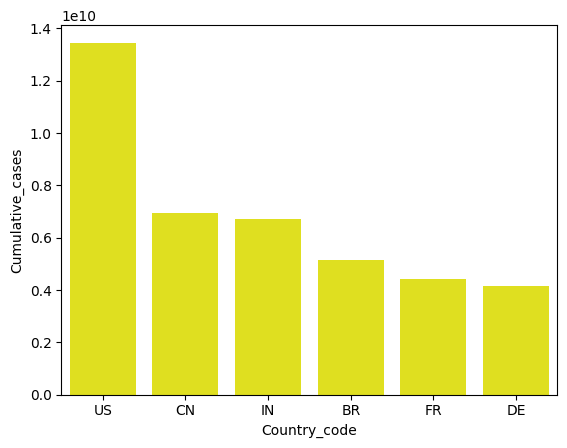

In [122]:
# 15
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv('/content/drive/MyDrive/Datasets/WHO-COVID-19-global-data.csv')
sum_cases = ds.groupby('Country_code').sum()['Cumulative_cases'].sort_values(ascending=False)
sns.barplot(sum_cases[0:6], color='yellow')
plt.show()

In [111]:
# 16
ds = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
print(ds['Fare'].skew())
print(ds['Fare'].kurtosis())

4.777671399019824
33.26460490128922


In [112]:
# 17
from scipy.stats import mannwhitneyu

group1 = ds[ds['Survived'] == 1]['Age'].dropna()
group2 = ds[ds['Survived'] == 0]['Age'].dropna()

stat, p = mannwhitneyu(group1, group2)

print(f'Statistics: {stat}, p-value: {p}')

Statistics: 89850.5, p-value: 0.36773665395476707


In [169]:
# 18
import numpy as np

replace_dict = {'k': 1000, 'M': 1000000}

def replace_and_multiply(x):
  if pd.isnull(x):
    return np.nan
  else:
    unit = x[-1]
    number = float(x[:-1])
    return number * replace_dict.get(unit, 1)

gdp = pd.read_csv('/content/drive/MyDrive/Datasets/gdp_pcap.csv')
pop = pd.read_csv('/content/drive/MyDrive/Datasets/pop.csv')
lex = pd.read_csv('/content/drive/MyDrive/Datasets/lex.csv')

ds = pd.DataFrame([gdp.iloc[:, -1], pop.iloc[:, -1], lex.iloc[:, -1]]).transpose()
ds.columns = ['gdp', 'pop', 'lex']

for serie in ['gdp', 'pop']:
  ds[serie] = ds[serie].apply(replace_and_multiply)

ds.corr()

,gdp,pop,lex
gdp,1.000000,-0.031582,0.163765
pop,-0.031582,1.000000,0.027512
lex,0.163765,0.027512,1.000000


In [155]:
# 19
ds = pd.read_csv('/content/drive/MyDrive/Datasets/winequality-red.csv', sep=';')
percentile = ds['total sulfur dioxide'].quantile(0.95)
ds[ds['total sulfur dioxide'] > percentile]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.99700,3.25,0.73,9.2,5
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1496,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1559,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1560,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5


In [156]:
# 20

# No 'New_tests' column

# from sklearn.linear_model import LinearRegression

# covid = pd.read_csv('/content/drive/MyDrive/Datasets/WHO-COVID-19-global-data.csv')
# ds = covid[['New_cases']]

# model = LinearRegression()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
53515,2024-03-10,ZW,Zimbabwe,AFRO,1.0,266359,NaN,5740
53516,2024-03-17,ZW,Zimbabwe,AFRO,NaN,266359,NaN,5740
53517,2024-03-24,ZW,Zimbabwe,AFRO,NaN,266359,NaN,5740
53518,2024-03-31,ZW,Zimbabwe,AFRO,NaN,266359,NaN,5740
